## By: Ahmed Ayman

**Simple Linear Regression**

In this simple linear regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# EDA

In [2]:
# Reading data from the link and showing data
df = pd.read_csv('http://bit.ly/w-data')
data = df.copy()
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.shape

(25, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


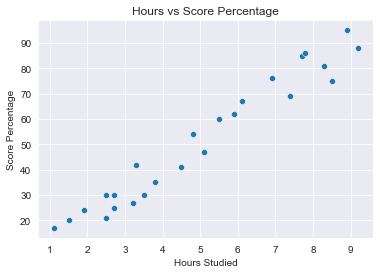

In [7]:
# Plotting the distribution of scores
sns.set_style(style='dark')
sns.scatterplot(data = data, x='Hours', y='Scores')
plt.title('Hours vs Score Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score Percentage')
plt.grid()
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and  score percentage.**

## Data Preparation

In [8]:
#separate the predictor(Hours) from the target(Scores)
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [9]:
#split the data with ratio of 4:1 to train and test sets respectively
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

In [10]:
print("size of training data is %d records and testing data is %d records" %( x_train.size,x_test.size))

size of training data is 20 records and testing data is 5 records


## Model Training

**Simple Linear Regression**

**Estimated Regression Function: 𝑓(𝑥)=𝑏₀+ 𝑏₁𝑥**

**Our goal is to calculate the optimal values of the predicted weights 𝑏₀ (intercept) and 𝑏₁(slope of estimated regression line) that minimize SSR and determine the estimated regression function.**



In [11]:
#Using the Linear Regression from the SkLearn Library
reg = LinearRegression()        
#Train the Model
reg.fit(x_train, y_train)

LinearRegression()

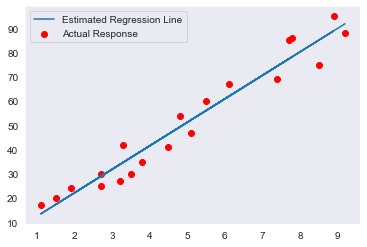

In [12]:
# Plotting the estimated regression line
# Equation od a straight line:    𝑓(𝑥)=𝑏₀+ 𝑏₁𝑥
line = reg.intercept_ + reg.coef_ * x_train

#Plotting the Actual Response
plt.scatter(x_train, y_train,color='red')

plt.plot(x_train, line);
plt.legend(["Estimated Regression Line", "Actual Response"], loc ="upper left")
plt.show()

## Model Evaluation

In [13]:
#predict on test(unseen data)
y_pred = reg.predict(x_test)

In [14]:
#compare real values tp predicted values on the test data
cp = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})  #by dictionary #key_value pair
cp

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [15]:
#Evaluation
print("mean_absolute_error=",mean_absolute_error(y_test, y_pred))

mean_absolute_error= 3.9207511902099244


## Inference

In [16]:
#Inference
studied_hours = 9.25
predict=reg.predict(np.reshape(studied_hours, (1, -1)))   # reshape since it contains only a single value
print("No of Hours = {}".format(studied_hours))
print("Predicted Score= {}".format( predict[0]))

No of Hours = 9.25
Predicted Score= 92.38611528261494
